In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("customer_support_data.csv")
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:
print("Shape:", df.shape)
df.info()
df.describe(include="all").transpose()


Shape: (85907, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Age

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,c27c9bb4-fa36-4140-9f1f-21009254ffdb,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Missing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


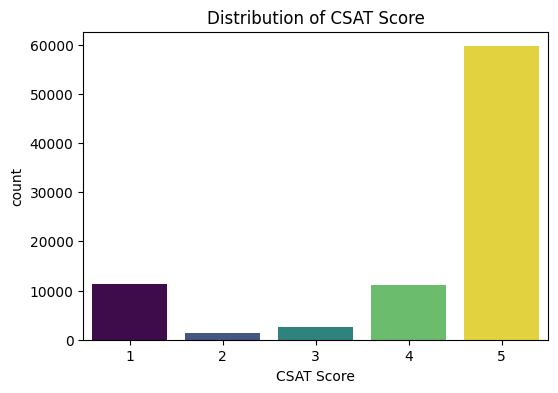

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="CSAT Score", data=df, hue="CSAT Score", palette="viridis", legend=False)
plt.title("Distribution of CSAT Score")
plt.show()


In [6]:
print(df.columns)


Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


#  Exploratory Data Analysis (EDA)

# Target Variable Distribution

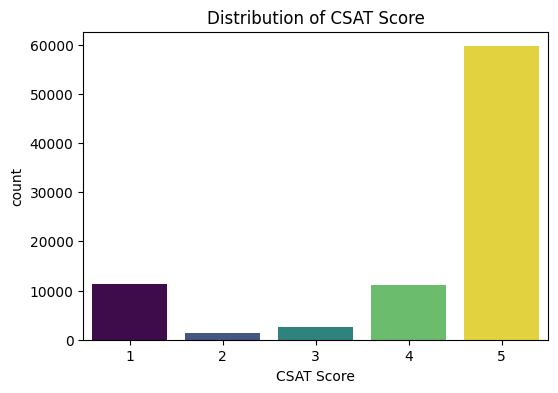

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="CSAT Score", hue="CSAT Score", data=df, palette="viridis", legend=False)
plt.title("Distribution of CSAT Score")
plt.show()

# CSAT by Channel 

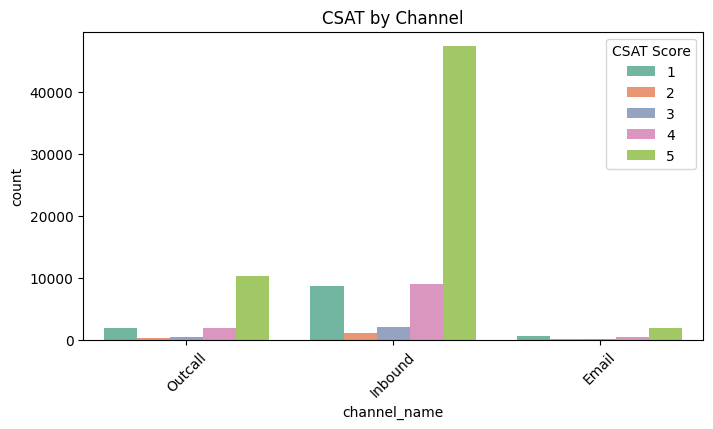

In [8]:
if {"CSAT Score","channel_name"} <= set(df.columns):
    plt.figure(figsize=(8,4))
    sns.countplot(x="channel_name", hue="CSAT Score", data=df, palette="Set2")
    plt.title("CSAT by Channel")
    plt.xticks(rotation=45)
    plt.show()

# Handling Time Distribution

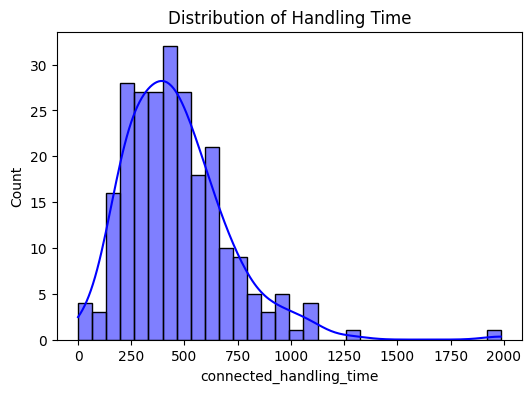

In [9]:
if "connected_handling_time" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["connected_handling_time"], bins=30, kde=True, color="blue")
    plt.title("Distribution of Handling Time")
    plt.show()

# Item Price vs CSAT

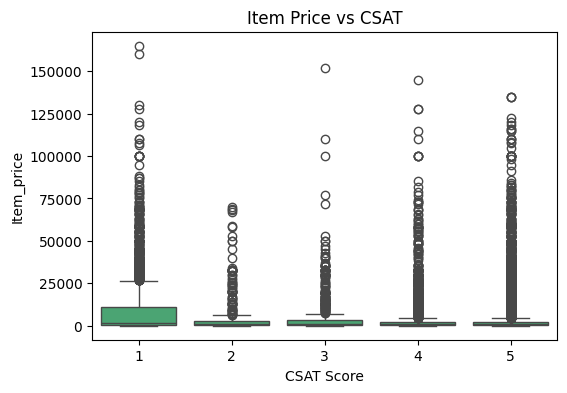

In [10]:
df_box = df[["CSAT Score", "Item_price"]].dropna()  # Correct column name
plt.figure(figsize=(6,4))
sns.boxplot(x="CSAT Score", y="Item_price", data=df_box, color="mediumseagreen")
plt.title("Item Price vs CSAT")
plt.show()


# Feature Engineering

# Convert date columns to datetime

In [11]:
date_cols = ["order_date_time", "Issue_reported at", "issue_responded", "Survey_response_Date"]

for col in date_cols:
    if col in df.columns:
        # Explicit format
        df[col] = pd.to_datetime(df[col], format="%d/%m/%Y %H:%M", errors='coerce')


## Create new features: response time & time since order (in minutes)

In [12]:
df["response_time_min"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds()/60
df["time_since_order_min"] = (df["Issue_reported at"] - df["order_date_time"]).dt.total_seconds()/60


# Fill missing values and clip unrealistic values

In [13]:
df["response_time_min"] = df["response_time_min"].fillna(df["response_time_min"].median()).clip(0, 60*24)
df["time_since_order_min"] = df["time_since_order_min"].fillna(df["time_since_order_min"].median()).clip(0, 60*24*30)


# Simple sentiment flag from Customer Remarks

In [14]:
neg_terms = ["not","bad","awful","delay","broken","refund","never","disappoint"]
df["neg_flag"] = df["Customer Remarks"].astype(str).str.lower().apply(lambda s: int(any(t in s for t in neg_terms)))


# Display first 5 rows of new features

In [15]:
df[["response_time_min","time_since_order_min","neg_flag"]].head()

,response_time_min,time_since_order_min,neg_flag
0,34.0,13017.0,0
1,2.0,13017.0,0
2,22.0,13017.0,0
3,20.0,13017.0,0
4,2.0,13017.0,0


# Preprocessing Pipeline

In [16]:
#Preprocessing Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define columns
text_col = "Customer Remarks"
num_cols = ["response_time_min", "time_since_order_min", "connected_handling_time", "Item_price", "neg_flag"]
cat_cols = ["channel_name", "category", "Sub-category", "Customer_City", "Product_category", "Tenure Bucket", "Agent Shift"]

# Numeric pipeline
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


# Categorical pipeline
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


# Text pipeline
text_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="")),
    ("tfidf", TfidfVectorizer(max_features=2000, ngram_range=(1,2)))
])

# Combine all transformers
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols),
    ("txt", text_transformer, text_col)
])


# Train-Test Split

In [17]:
# Features (X) and target (y)
X = df[num_cols + cat_cols + [text_col]]
y = df["CSAT Score"].apply(lambda x: 1 if x >= 4 else 0)  # 1 = satisfied, 0 = not satisfied

from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (64430, 13)
X_test : (21477, 13)
y_train: (64430,)
y_test : (21477,)


# Baseline Model (Random Forest)


In [18]:
print(X_train.head())  # Original features
print(preprocessor)    # Preprocessor defined hai ya nahi


       response_time_min  time_since_order_min  connected_handling_time  \
36514                3.0               13017.0                      NaN   
56385                5.0                6075.0                      NaN   
48990                1.0               13017.0                      NaN   
32084               12.0               16144.0                      NaN   
81089              375.0               13017.0                      NaN   

       Item_price  neg_flag channel_name           category  \
36514         NaN         0      Inbound      Order Related   
56385     10499.0         0      Outcall      Order Related   
48990         NaN         0      Inbound     Refund Related   
32084       899.0         0      Inbound            Returns   
81089         NaN         0      Inbound  Shopzilla Related   

                Sub-category Customer_City Product_category    Tenure Bucket  \
36514                Delayed           NaN              NaN              >90   
56385     

# Preprocessing 

In [22]:
print(type(X_train))
print(X_train.shape)


<class 'pandas.core.frame.DataFrame'>
(64430, 13)


In [26]:
# Split columns into categorical and numeric
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X_train.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)
print("X_train columns:", X_train.columns.tolist())


Categorical Columns: ['channel_name', 'category', 'Sub-category', 'Customer_City', 'Product_category', 'Tenure Bucket', 'Agent Shift', 'Customer Remarks']
Numeric Columns: ['response_time_min', 'time_since_order_min', 'connected_handling_time', 'Item_price', 'neg_flag']
X_train columns: ['response_time_min', 'time_since_order_min', 'connected_handling_time', 'Item_price', 'neg_flag', 'channel_name', 'category', 'Sub-category', 'Customer_City', 'Product_category', 'Tenure Bucket', 'Agent Shift', 'Customer Remarks']


In [40]:
import pickle

# Save variables to a file
with open("dataset_vars.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

print("Variables saved successfully ")


Variables saved successfully 


In [32]:
import pickle

# Save train-test split variables
with open("dataset_vars.pkl", "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

print("Train-Test variables saved successfully ")


Train-Test variables saved successfully ✅


In [33]:
import joblib

joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")
print("Variables saved successfully ")


Variables saved successfully ✅


In [34]:
# Basic Libraries
import pandas as pd
import numpy as np

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Explainability
import shap
import matplotlib.pyplot as plt


In [35]:
# Identify columns
categorical_cols = ['channel_name', 'category', 'Sub-category', 'Customer_City', 'Product_category', 'Tenure Bucket', 'Agent Shift', 'Customer Remarks']
numeric_cols = ['response_time_min', 'time_since_order_min', 'connected_handling_time', 'Item_price', 'neg_flag']

# Preprocessor
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing done ")
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)


Preprocessing done ✅
X_train_processed shape: (64430, 15511)
X_test_processed shape: (21477, 15511)


# Baseline Model – Random Forest

In [39]:
# Initialize Random Forest
baseline_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
baseline_model.fit(X_train_processed, y_train)
print("Baseline model trained successfully ")


Baseline model trained successfully 


# Predictions


In [37]:
# Predictions
y_pred = baseline_model.predict(X_test_processed)

# Accuracy & Classification Report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.8145923546119104

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.18      0.25      3768
           1       0.84      0.95      0.89     17709

    accuracy                           0.81     21477
   macro avg       0.64      0.56      0.57     21477
weighted avg       0.77      0.81      0.78     21477


Confusion Matrix:
 [[  675  3093]
 [  889 16820]]


# Explainability with SHAP

In [ ]:
import shap
import matplotlib.pyplot as plt

# Dense conversion (agar sparse matrix hai)
X_test_dense = X_test_processed.toarray()

# SHAP explainer
explainer = shap.TreeExplainer(baseline_model)
shap_values = explainer.shap_values(X_test_dense)

# Summary plot for class 1
shap.summary_plot(shap_values[1], X_test_dense, feature_names=preprocessor.get_feature_names_out(), show=True)

#force matplotlib to show plots in notebook
plt.show()


# save the model

In [ ]:
import joblib

# Save processed data
joblib.dump(X_train_processed, "X_train_processed.pkl")
joblib.dump(X_test_processed, "X_test_processed.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")


In [ ]:
X_train_processed = joblib.load("X_train_processed.pkl")
X_test_processed = joblib.load("X_test_processed.pkl")
y_train = joblib.load("y_train.pkl")
y_test = joblib.load("y_test.pkl")


In [ ]:
joblib.dump(baseline_model, "baseline_model.pkl")


In [ ]:
baseline_model = joblib.load("baseline_model.pkl")
